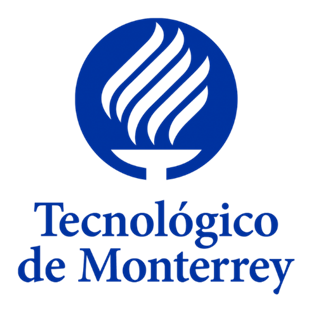 

Instituto Tecnológico y de Estudios Superiores de Monterrey
 
Materia: Ciencia de datos

Tema: Repaso Transformación y Reducción de dimensiones - Semana 6

Profesora: María de la Paz Rico Fernández 

Estudiantes: 
Liliana del Pilar Pineda González - A01793685
Ricardo Loor - A01793943

Fecha: 22 de octubre de 2022


# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y Reconstrucción
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)






```
# Tiene formato de código
```

# Eigenvalores y eigenvectores

EJERCICIO 1

In [1]:
import numpy as np
from numpy import array # importar el método array
from numpy.linalg import eig #esta función trae el método eig el cual tiene como resultado 2 valores: eigenvalues y los eigenvectores, eig (descomposición) 
from numpy.linalg import inv
# declaramos una matriz 3 x 3
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [2]:
#Utiliza el método eig a la matriz A y coloca los valores en las variables correspondientes
#Un eigenvalor de una transformación lineal T : V → V es un escalar tal que λ id – T no es invertible 
#En otras palabras, es un escalar tal que existe un vector no cero en el kernel de λ id – T 
#El cálculo de los valores propios y de los vectores propios de una matriz simétrica son claves 
# Se tiene una función eig que calcula los valores y vectores propios
values, vectors = eig(A)
print(values.round(2)) #D
print(vectors.round(2)) #W

[16.12 -1.12 -0.  ]
[[-0.23 -0.79  0.41]
 [-0.53 -0.09 -0.82]
 [-0.82  0.61  0.41]]


In [3]:
#el resultado anterior significa que cada eigen valor tiene asociado un egen vector
#Se hallan las raíces del polinomio característico
#Se calcula el vector propio de cada valor propio
W = vectors.round(2)
Winv = inv(W)
Winv.round(2)

array([[-0.48, -0.59, -0.7 ],
       [-0.92, -0.25,  0.42],
       [ 0.41, -0.81,  0.41]])

In [4]:
I = W * Winv
I.round(2)

array([[ 0.11,  0.47, -0.29],
       [ 0.49,  0.02, -0.34],
       [-0.33, -0.49,  0.17]])

In [5]:
W = vectors
D = np.diag(values) #multiplicación sobre la diagnonal
Winv = inv(W) #invertida

B = np.dot(W,D) #Esta función devuelve el producto punto de dos matrices
B = np.dot(B,Winv) #La matriz resultante del producto quedará con el mismo número de filas de la primera y con el mismo número de columnas de la segunda
B.round(2)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


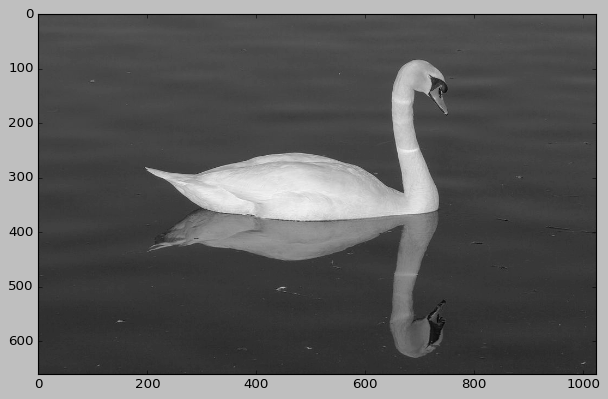

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F94D3E2AC90>


In [6]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic') # configura gráfico classic. Variable llamada imagen
#la URL importa la imagen y con convert LA la deja en escala de grises
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
#Toma la imagen y la convierte en gris. Crea la lista de datos y los convierte en arreglos 
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [7]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [8]:
U.shape

(660, 660)

In [9]:
V.shape

(1024, 1024)

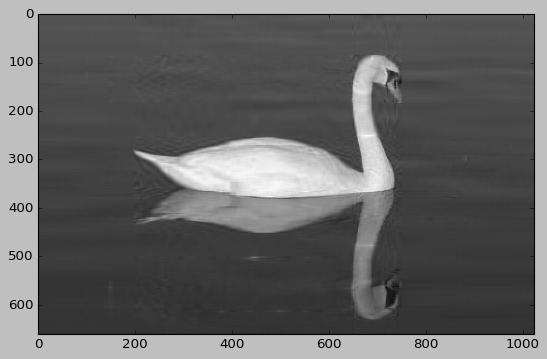

Felicidades la imagen está comprimida


In [10]:
#Cuantos valores crees que son necesarios
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 30
#A medida que disminuye el nvalue (toman 30 valores de los 660), bajan los pixeles y la nitidez de la imagen empeora. 
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

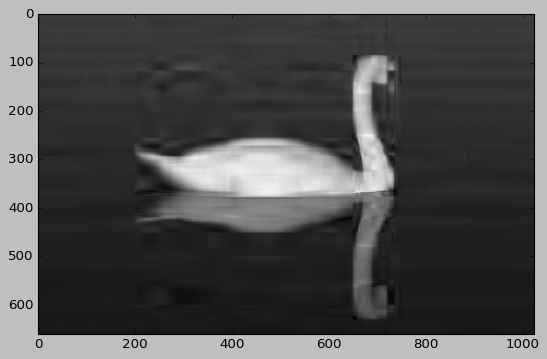

Felicidades la imagen está comprimida


In [11]:
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 10
#A medida que disminuye el nvalue (toman 10 valores de los 660), bajan los pixeles y la nitidez de la imagen empeora. 
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

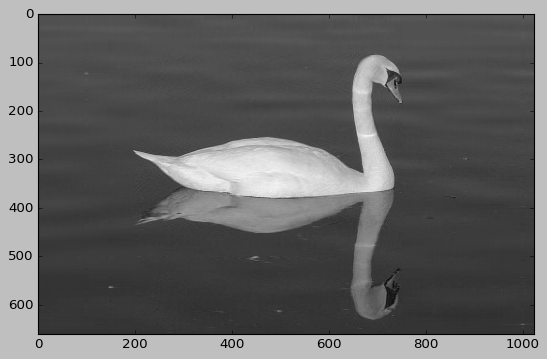

Felicidades la imagen está comprimida


In [12]:
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 80
#A medida que aumenta el nvalue (toman 80 valores de los 660), suben los pixeles y la nitidez de la imagen mejora. 
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!
Comprime 3 imagenes

[140. 141. 142. ... 147. 122.  65.]


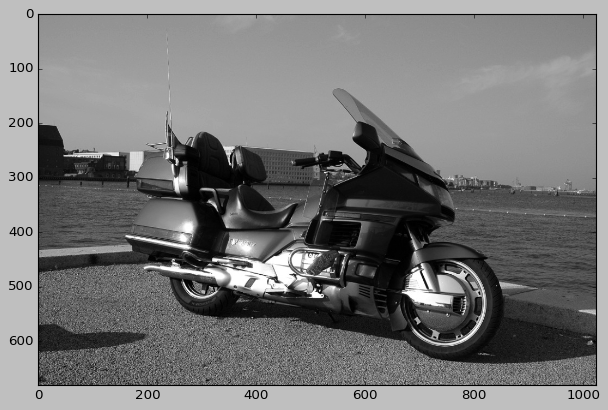

<PIL.Image.Image image mode=LA size=1024x680 at 0x7F94BB1D05D0>


In [13]:
#imagen 1
plt.style.use('classic') # configura gráfico classic. Variable llamada imagen
#la URL importa la imagen y con convert LA la deja en escala de grises
img = Image.open(urllib.request.urlopen('https://programacionpython80889555.files.wordpress.com/2019/06/honda_goldwing_1500.jpg?w=1024')).convert('LA')
#img = Image.open('moto.jpg')
imggray = img.convert('LA') #Devuelve una copia convertida de la imagen de la moto, traduce los pixeles a través de la paleta.
#Toma la imagen de la moto y la convierte en gris. Crea la lista de datos y los convierte en arreglos 
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

https://programacionpython80889555.files.wordpress.com/2019/06/honda_goldwing_1500.jpg?w=1024 

[254. 254. 254. ... 255. 255. 255.]


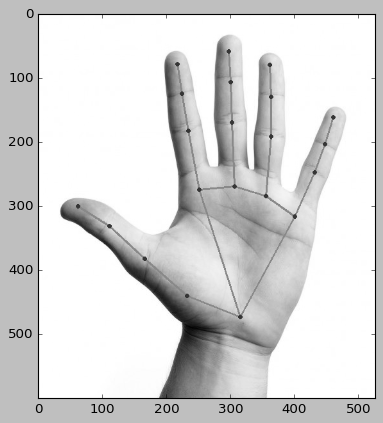

<PIL.Image.Image image mode=LA size=527x600 at 0x7F94BB131950>


In [14]:
#imagen 2
plt.style.use('classic') # configura gráfico classic. Variable llamada imagen
#la URL importa la imagen y con convert LA la deja en escala de grises
img = Image.open(urllib.request.urlopen('https://programacionpython80889555.files.wordpress.com/2021/06/annotated_imageh0.png')).convert('LA')
#img = Image.open('mano.jpg')
imggray = img.convert('LA') #Devuelve una copia convertida de la imagen de la mano, traduce los pixeles a través de la paleta.
#Toma la imagen de la mano y la convierte en gris. Crea la lista de datos y los convierte en arreglos 
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

[  2.   2.   2. ... 117. 118. 122.]


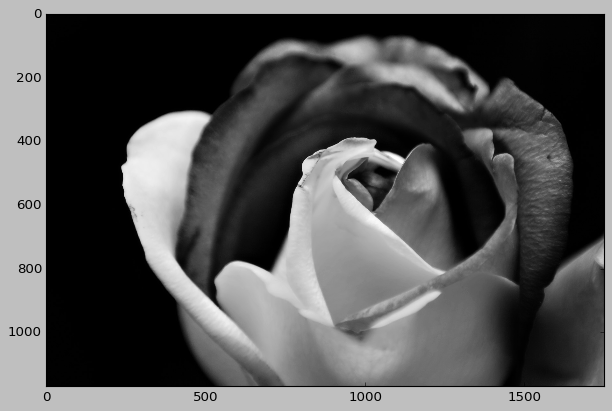

<PIL.Image.Image image mode=LA size=1752x1168 at 0x7F94BB15D590>


In [15]:
#imagen 3
#imagen 2
plt.style.use('classic') # configura gráfico classic. Variable llamada imagen
#la URL importa la imagen y con convert LA la deja en escala de grises
img = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/6/61/Rainbow_Rose_%283366550029%29.jpg')).convert('LA')
#img = Image.open('flor.jpg')
imggray = img.convert('LA') #Devuelve una copia convertida de la imagen de la flor, traduce los pixeles a través de la paleta.
#Toma la imagen de la flor y la convierte en gris. Crea la lista de datos y los convierte en arreglos 
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)


# Ejercicio 3

**Feature importances o importancia de las variables o características.**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e


Danos tus comentarios acerca de lo más relevante del ejercicio y que descubriste de las variables análizadas. Adjunta tu notebook y el link. 

In [16]:
#código aquí
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

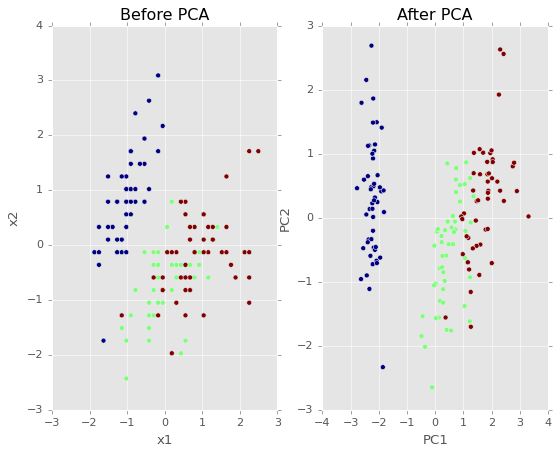

In [17]:
#Grafiquemos los datos antes y después de la transformación PCA y también codifiquemos con colores cada punto (muestra) usando la clase correspondiente de la flor (y)
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [18]:
#Podemos ver que en el espacio PCA, la varianza se maximiza a lo largo de PC1 (explica el 73 % de la varianza) y PC2 (explica el 22 % de la varianza). Juntos, explican el 95%.
print(pca.explained_variance_ratio_)
# array([0.72962445, 0.22850762])

[0.72962445 0.22850762]


In [19]:
#Prueba de que los valores propios de la matriz de covarianza original son iguales a las varianzas del espacio reducido
#La prueba de máxima varianza también se puede ver estimando la matriz de covarianza del espacio reducido
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [20]:
#Observamos que estos valores (en la diagonal tenemos las varianzas) son iguales a los valores propios reales de la covarianza almacenada en :pca.explained_variance_
pca.explained_variance_ 
array([2.93808505, 0.9201649])

array([2.93808505, 0.9201649 ])

Podemos concluir que las características 1, 3 y 4 son las más importantes para PC1. De manera similar, podemos afirmar que la función 2 y luego la 1 son las más importantes para PC2.

Para resumir, nos fijamos en los valores absolutos de los componentes de los vectores propios correspondientes a los k valores propios más grandes. En sklearn los componentes se ordenan por varianza explicada. Cuanto mayores son estos valores absolutos, más contribuye una característica específica a ese componente principal.

In [21]:
#La trama bipartita
#El biplot es la mejor manera de visualizar todo en uno después de un análisis PCA .
#Hay una implementación en R pero no hay una implementación estándar en python, así que decidí escribir mi propia función para eso:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

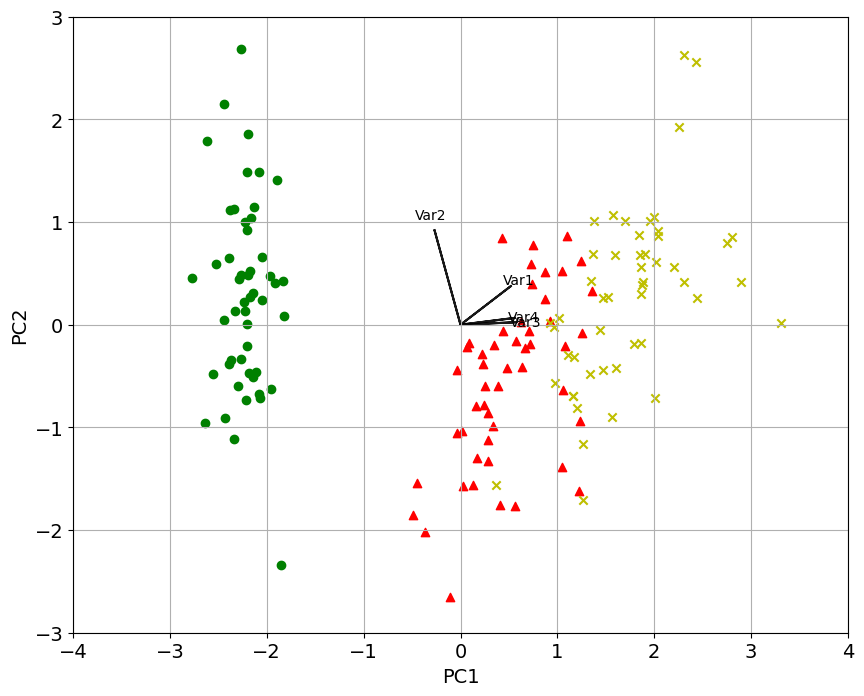

In [22]:
#Llame a la función (asegúrese de ejecutar primero los bloques iniciales de código donde cargamos los datos del iris y realizamos el análisis PCA):

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [23]:
#De nuevo podemos verificar visualmente que a) la varianza está maximizada yb) que las características 1, 3 y 4 son las más importantes para PC1.
#De manera similar, la característica 2 y luego la 1 son las más importantes para PC2.
#Las flechas (variables/características) que apuntan en la misma dirección indican correlación entre las variables que representan
#Las flechas que apuntan en direcciones opuestas indican un contraste entre las variables que representan.

#Para verificar se usa el código:

# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

Contesta las siguientes preguntas en una o varias celdas de texto en tu notebook:

1. Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances. 

Partimos de variables de entrada originales almacenadas en X con puntuación z, con media cero y desviación estándar unitaria; construimos y descomponemos la matriz de covarianzaCx=(1/n)X'X; clasificamos valores propios en orden decreciente; transformamos datos normalizados originales en el espacio PCA reducido, multiplicando los datos normalizados originalmente por los vectores propios principales de la matriz de covarianza, es decir, los PC y maximizamos la variación de los datos originales. Finalmente, visualizamos en un gráfico biplot.

2. ¿Qué es feature importance y para qué nos sirve?

PCA es una técnica de reducción de dimensionalidad no supervisada que construye características/variables relevantes a través de combinaciones lineales o no lineales de las variables originales (características). Útil en procesamiento de datos donde existe multicolinealidad entre las características / variables, cuando las dimensiones de las características de entrada son altas (por ejemplo, muchas variables) y para la eliminación de ruido y la compresión de datos.

3. ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

-	Podemos ver que en el espacio PCA, la varianza se maximiza a lo largo de PC1 (explica el 73 % de la varianza) y PC2 (explica el 22 % de la varianza). Juntos, explican el 95%.
-	Las características 1, 3 y 4 son las más importantes para PC1. De manera similar, podemos afirmar que la función 2 y luego la 1 son las más importantes para PC2.
-	El biplot es la mejor manera de visualizar todo en uno después de un análisis PCA 
-	La prueba de máxima varianza también se puede ver estimando la matriz de covarianza del espacio reducido, con np.cov(X_nuevo.T)
-	La importancia de cada característica se refleja en la magnitud de los valores correspondientes en los vectores propios (mayor magnitud, mayor importancia).

4. ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

-	Detección más eficaz de regiones en una imagen
-	En el campo agropecuario análisis y evaluación de pastos y forrajes, calidad de leche, carne y agua.
